In [1]:
import io
import os
import re
import shutil
import zipfile

In [2]:
from PIL import Image
from IPython.display import display
from tqdm import tqdm

In [3]:
def extract_images_bytes(path='train.zip'):
    z = zipfile.ZipFile(path, 'r')
    images = []
    for file in z.filelist:
        m = re.match('.*(cat|dog).*', file.filename)
        if m:
            category = m.groups()[0]
            if category != 'cat': continue
            fp = z.open(file.filename)
            img = fp.read()
            img = Image.open(io.BytesIO(img))
            img = img.convert('L')
            images.append((file.filename, img))
    return images

In [4]:
train_images = extract_images_bytes('../CatDog/train.zip')

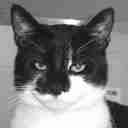

In [5]:
display(train_images[0][1])

In [6]:
train_output = 'train_gray'
test_output ='test_gray'

In [7]:
for filename, img in tqdm(train_images):
    path = os.path.join(train_output, filename)
    dir_path = os.path.dirname(path)
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
    img.save(path)

100%|██████████| 10000/10000 [00:02<00:00, 3526.95it/s] | 231/10000 [00:00<00:04, 2308.03it/s]


In [8]:
test_images = extract_images_bytes('../CatDog/test.zip')

In [9]:
for filename, img in tqdm(test_images):
    path = os.path.join(test_output, filename)
    dir_path = os.path.dirname(path)
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
    img.save(path)

100%|██████████| 2500/2500 [00:00<00:00, 3541.22it/s]  | 345/2500 [00:00<00:00, 3445.40it/s]


In [10]:
def zipdir(path, ziph):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file))

In [11]:
zipf = zipfile.ZipFile(train_output + '.zip', 'w', zipfile.ZIP_DEFLATED)
zipdir(train_output, zipf)
zipf.close()

In [12]:
zipf = zipfile.ZipFile(test_output + '.zip', 'w', zipfile.ZIP_DEFLATED)
zipdir(test_output, zipf)
zipf.close()

In [13]:
shutil.rmtree(train_output)
shutil.rmtree(test_output)